In [1]:
!git clone https://github.com/Mishra-Ashutosh-08/Face-Recognition.git

Cloning into 'Face-Recognition'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 5 (delta 0), reused 5 (delta 0), pack-reused 0
Unpacking objects: 100% (5/5), done.


In [2]:
!ls Face-Recognition

clean_data


In [3]:
!ls Face-Recognition/clean_data

images.p  labels.p


In [4]:
import pickle
import matplotlib.pyplot as plt
import cv2
import numpy as np

from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam, RMSprop
from keras.utils.np_utils import to_categorical

In [5]:
with open('Face-Recognition/clean_data/images.p','rb') as f:
  images = pickle.load(f)

with open('Face-Recognition/clean_data/labels.p','rb') as f:
  labels = pickle.load(f)

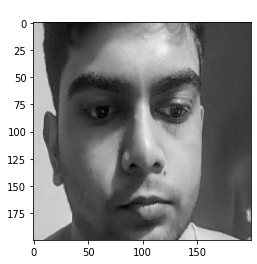

In [6]:
plt.imshow(images[0],cmap='gray')
plt.title(labels[0],color='w')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(images,labels,test_size=0.2)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [9]:
labels

array(['Ashutosh', 'Ashutosh', 'Ashutosh', 'Ashutosh', 'Ashutosh',
       'Ashutosh', 'Ashutosh', 'Ashutosh', 'Ashutosh', 'Ashutosh',
       'Ashutosh', 'Ashutosh', 'Ashutosh', 'Ashutosh', 'Ashutosh',
       'Ashutosh', 'Ashutosh', 'Ashutosh', 'Ashutosh', 'Ashutosh',
       'Ashutosh', 'Ashutosh', 'Ashutosh', 'Ashutosh', 'Ashutosh',
       'Ashutosh', 'Ashutosh', 'Ashutosh', 'Ashutosh', 'Ashutosh',
       'Ashutosh', 'Ashutosh', 'Ashutosh', 'Ashutosh', 'Ashutosh',
       'Ashutosh', 'Ashutosh', 'Ashutosh', 'Ashutosh', 'Ashutosh',
       'Ashutosh', 'Ashutosh', 'Ashutosh', 'Ashutosh', 'Ashutosh',
       'Ashutosh', 'Ashutosh', 'Ashutosh', 'Ashutosh', 'Ashutosh',
       'Ashutosh', 'Ashutosh', 'Ashutosh', 'Ashutosh', 'Ashutosh',
       'Ashutosh', 'Ashutosh', 'Ashutosh', 'Ashutosh', 'Ashutosh',
       'Ashutosh', 'Ashutosh', 'Ashutosh', 'Ashutosh', 'Ashutosh',
       'Ashutosh', 'Ashutosh', 'Ashutosh', 'Ashutosh', 'Ashutosh',
       'Ashutosh', 'Ashutosh', 'Ashutosh', 'Ashutosh', 'Ashuto

In [10]:
set(labels)

{'Ashutosh', 'Durga', 'Faijan', 'Malay', 'Prasenjit'}

In [11]:
len(set(labels))

5

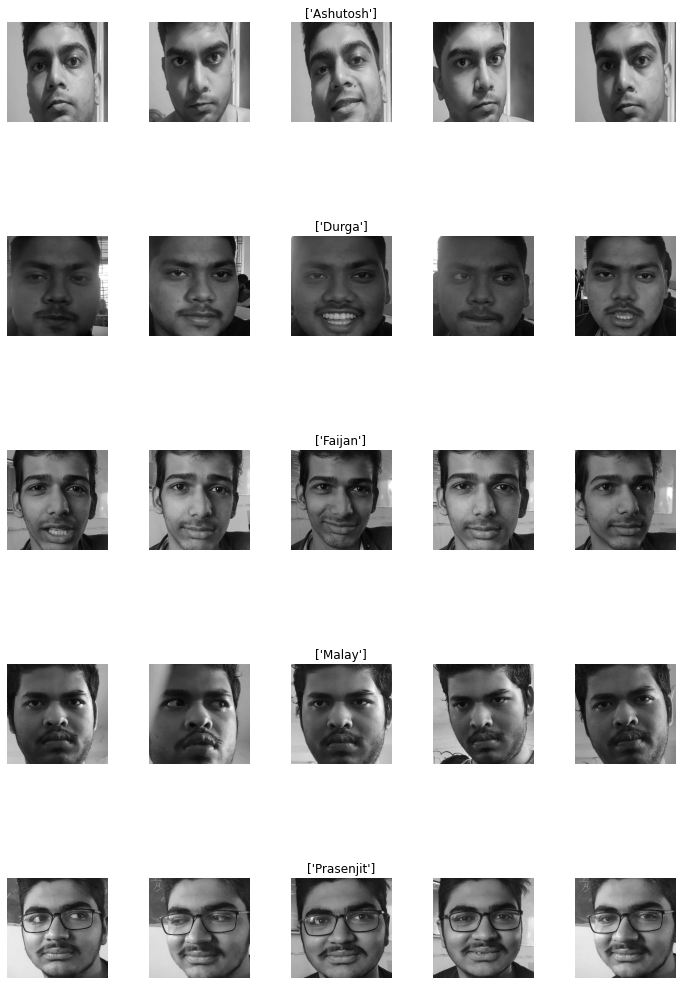

In [12]:
num_classes = len(set(labels))
cols = 5

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(10,15))
fig.tight_layout()

for i in range(cols):
  for j in range(num_classes):
    x_selected = x_train[y_train == j]
    axs[j][i].imshow(x_selected[np.random.randint(0,(len(x_selected)-1)),:,:],cmap=plt.get_cmap("gray"))
    axs[j][i].axis("off")
    if i==2:
      axs[j][i].set_title(le.inverse_transform(np.array([j])))

In [13]:
def preprocess(img):
  img = cv2.equalizeHist(img)
  img = img.reshape(200,200,1)
  img = img/255
  return img

In [14]:
x_train = np.array(list(map(preprocess,x_train)))
x_test = np.array(list(map(preprocess,x_test)))

In [15]:
print(x_train.shape)
print(x_test.shape)

(783, 200, 200, 1)
(196, 200, 200, 1)


In [16]:
y_train=to_categorical(y_train,num_classes)
y_test=to_categorical(y_test,num_classes)

In [17]:
model=Sequential()

model.add(Conv2D(16,(5,5),input_shape=(200,200,1),activation='relu'))
model.add(Conv2D(16,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))

model.compile(RMSprop(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 196, 196, 16)      416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 192, 192, 16)      6416      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 96, 96, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 94, 94, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 92, 92, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 44, 44, 64)        1

In [19]:
h = model.fit(x_train,y_train,epochs=20,verbose=1,validation_data=(x_test,y_test))

Epoch 1/20
25/25 [==============================] - 1s 47ms/step - loss: 1.4823 - accuracy: 0.3959 - val_loss: 0.8925 - val_accuracy: 0.6327
Epoch 2/20
25/25 [==============================] - 1s 32ms/step - loss: 0.3399 - accuracy: 0.9195 - val_loss: 0.0646 - val_accuracy: 0.9847
Epoch 3/20
25/25 [==============================] - 1s 33ms/step - loss: 0.0691 - accuracy: 0.9936 - val_loss: 1.2217 - val_accuracy: 0.6684
Epoch 4/20
25/25 [==============================] - 1s 33ms/step - loss: 0.1308 - accuracy: 0.9719 - val_loss: 0.0418 - val_accuracy: 0.9847
Epoch 5/20
25/25 [==============================] - 1s 32ms/step - loss: 5.2539e-04 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 6/20
25/25 [==============================] - 1s 32ms/step - loss: 4.2144e-05 - accuracy: 1.0000 - val_loss: 0.0096 - val_accuracy: 0.9949
Epoch 7/20
25/25 [==============================] - 1s 32ms/step - loss: 1.1446e-05 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 0.9949
E

In [24]:
from keras.models import Model

In [25]:
layer1 = Model(model.layers[0].input, model.layers[0].output)

<function matplotlib.pyplot.show>

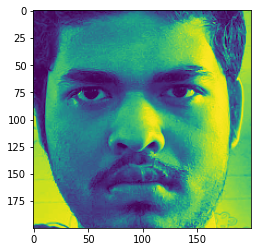

In [26]:
img = x_test[190]
img = img.reshape(200,200)
plt.imshow(img)
plt.show

In [27]:
features = layer1.predict(img.reshape(1,200,200,1))

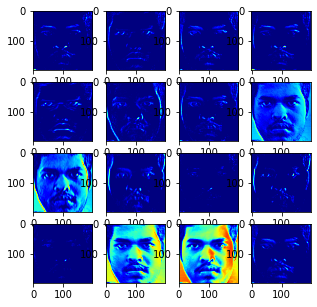

In [28]:
plt.figure(figsize=(5,5))
for i in range(16):
  axes = plt.subplot(4,4,i+1)
  axes.imshow(features[0,:,:,i],cmap='jet')
plt.show()

In [29]:
pred = model.predict_classes(img.reshape(1,200,200,1))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [30]:
le.inverse_transform(pred)

array(['Malay'], dtype='<U9')

In [31]:
label_mappings = le.inverse_transform(np.arange(num_classes))
print(label_mappings)

['Ashutosh' 'Durga' 'Faijan' 'Malay' 'Prasenjit']


In [32]:
with open('labels_mappings.p','wb') as f:
  pickle.dump(label_mappings,f)

In [33]:
model.save("face_recognition.h5")